In [1]:
from recordtype import recordtype
import numpy as np


Task = recordtype('Task', 'weight duration due done')

# create todo tasks
def create_tasks(num): 
    tasks = []
    distribution = np.round(np.random.exponential(5,10000))
    for i in range(num):
        weight = np.random.randint(1,100)
        due = np.random.choice(distribution) + 1
        duration = np.random.randint(0,due)
        t = Task(weight=weight, duration=duration, due=due, done=0) 
        tasks.append(t)  
    return tasks


In [2]:
def tally(completed_tasks, all_tasks):
        
    completed = len(completed_tasks)/len(all_tasks)    

    
    percentile = round(0.75 * len(all_tasks))
    important_tasks = sorted(all_tasks, key=lambda x: x.weight)[percentile:len(all_tasks)]

    
    overlap = 0
    for t in important_tasks:
        if t in completed_tasks:
            overlap += 1
    if len(important_tasks) > 0:
        important = overlap/len(important_tasks)
    else:
        important = 0
    intime_tasks = []
    for task in completed_tasks:
        if task.done <= task.due:
            intime_tasks.append(task)
    intime = len(intime_tasks)/len(all_tasks)
    
    return (completed, important, intime)


In [3]:
def duration(task): 
    return task.duration


def simulate(ratio, *tasks):
    deadline = ratio * sum(list(map(duration, tasks)))
    completed_tasks = []
    elapsed_time = 0
    for task in tasks:
        elapsed_time += task.duration
        if elapsed_time <= deadline:
            task.done = elapsed_time
            completed_tasks.append(task)
        else:
            break
    
    return tally(completed_tasks, tasks)


In [11]:
def add(a, b): return tuple(map(lambda x, y: x + y, a, b))
def divide(a, b): return tuple([x/b for x in a])
 
def run(ratio, iterations, num, algorithm):
    results, final_results = (0,0,0), (0,0,0)

    for i in range(iterations):
        tasks = create_tasks(num)
        results = simulate(ratio, *tuple(algorithm(*tasks)))
        final_results = add(final_results, results)
        #print(final_results)

    return divide(final_results, iterations)

def print_results(data):
    params = ("- tasks completed",
              "- important tasks completed",
              "- tasks completed in time")
    for d,p in zip(data, params):
        print("{0:s} : {1:3.2f}%".format(p.ljust(40, ' '), d*100))   

In [12]:
def as_they_come(*tasks):
    return tasks

def due_first(*tasks):
    return sorted(tasks, key=lambda x: x.due)

def due_last(*tasks):
    return sorted(tasks, key=lambda x: x.due, reverse=True)

def important_first(*tasks):
    return sorted(tasks, key=lambda x: x.weight, reverse=True) 

def easier_first(*tasks):
    return sorted(tasks, key=lambda x: x.duration)

def easier_important_first(*tasks):
    return sorted(tasks, key=lambda x: x.duration/x.weight)

def easier_due_first(*tasks):
    return sorted(tasks, key=lambda x: x.duration/x.due)

Do as they come
- tasks completed                        : 49.22%
- important tasks completed              : 48.02%
- tasks completed in time                : 5.79%

Due tasks first
- tasks completed                        : 80.17%
- important tasks completed              : 79.94%
- tasks completed in time                : 19.56%

Due tasks last
- tasks completed                        : 18.36%
- important tasks completed              : 17.33%
- tasks completed in time                : 3.26%

Important tasks first
- tasks completed                        : 49.49%
- important tasks completed              : 99.95%
- tasks completed in time                : 6.01%

Easier tasks first
- tasks completed                        : 84.94%
- important tasks completed              : 84.81%
- tasks completed in time                : 39.24%

Easier important tasks first
- tasks completed                        : 79.75%
- important tasks completed              : 94.90%
- tasks completed in time      

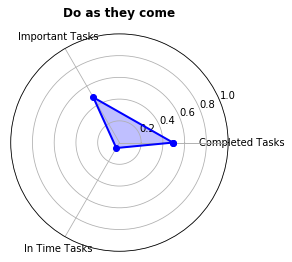

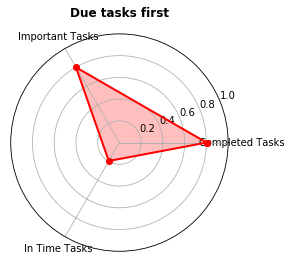

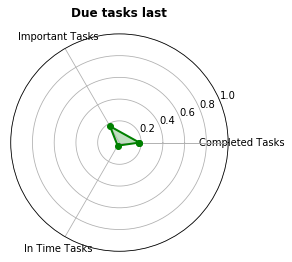

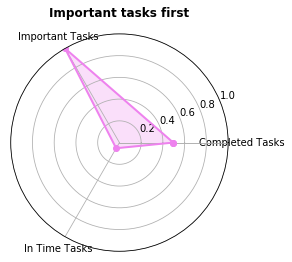

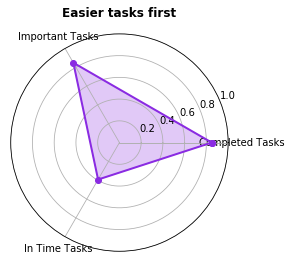

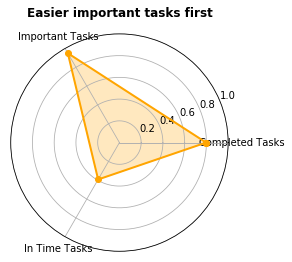

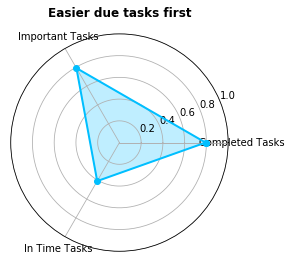

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def chart(data, title):
    labels=np.array(['Completed Tasks', 'Important Tasks', 'In Time Tasks'])
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))    
    
    colors = ['blue', 'red', 'green', 'violet', 'blueviolet', 'orange', 'deepskyblue', 'darkgreen']
    for d, t, c in zip(data, title, colors):
        fig=plt.figure()
        d=np.concatenate((d,[d[0]]))
        ax = fig.add_subplot(111, polar=True)
        ax.set_title(t, weight='bold', size='large')      
        ax.plot(angles, d, 'o-', linewidth=2, color=c)
        ax.fill(angles, d, alpha=0.25, color=c)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        ax.set_ylim(0,1.0)
        ax.grid(True)

        

ratio = 0.5

iterations = 1000

num = 50

algorithms = (as_they_come,
              due_first,
              due_last,
              important_first,
              easier_first,              
              easier_important_first,
              easier_due_first)

labels = ("Do as they come", 
           "Due tasks first", 
           "Due tasks last",
           "Important tasks first", 
           "Easier tasks first", 
           "Easier important tasks first",
           "Easier due tasks first")

data = []

for algo, label in zip(algorithms, labels):
    d = run(ratio, iterations, num, algo)
    print(label)
    print_results(d)
    data.append(d)
    print()

chart(data, labels)
